# EDA & PREPROCESSING

In [1]:

# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dabl
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip



C:\Users\FATTANI COMPUTERS\AppData\Local\Temp\ipykernel_17084\1191707248.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv(dabl.datasets.data_path("E:\GPL\Project1\WildBlueberryPollinationSimulationData.csv"))
data_clean = dabl.clean(data)
data_clean


,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,16.00,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,1.00,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,1.00,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.354413,0.382703,28.873714,3436.493543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471,5333.873335
773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005,3373.436842
774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.404617,0.401670,30.748240,4203.027624
775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,0.401538,0.399935,30.582161,4166.299735


In [3]:
data_clean.describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [4]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             777 non-null    float64
 1   honeybee              777 non-null    float64
 2   bumbles               777 non-null    float64
 3   andrena               777 non-null    float64
 4   osmia                 777 non-null    float64
 5   MaxOfUpperTRange      777 non-null    float64
 6   MinOfUpperTRange      777 non-null    float64
 7   AverageOfUpperTRange  777 non-null    float64
 8   MaxOfLowerTRange      777 non-null    float64
 9   MinOfLowerTRange      777 non-null    float64
 10  AverageOfLowerTRange  777 non-null    float64
 11  RainingDays           777 non-null    float64
 12  AverageRainingDays    777 non-null    float64
 13  fruitset              777 non-null    float64
 14  fruitmass             777 non-null    float64
 15  seeds                 7

In [5]:
data_clean.corr()['yield']

clonesize              -0.516737
honeybee               -0.044250
bumbles                 0.309407
andrena                 0.140277
osmia                   0.380892
MaxOfUpperTRange       -0.187075
MinOfUpperTRange       -0.175883
AverageOfUpperTRange   -0.181774
MaxOfLowerTRange       -0.187439
MinOfLowerTRange       -0.183339
AverageOfLowerTRange   -0.181293
RainingDays            -0.540069
AverageRainingDays     -0.541215
fruitset                0.984081
fruitmass               0.930365
seeds                   0.961249
yield                   1.000000
Name: yield, dtype: float64

In [6]:
data_clean = dabl.clean(data, type_hints={"yield": "continuous"})
data_clean

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,16.00,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,1.00,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,1.00,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.354413,0.382703,28.873714,3436.493543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471,5333.873335
773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005,3373.436842
774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.404617,0.401670,30.748240,4203.027624
775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,0.401538,0.399935,30.582161,4166.299735


Target looks like regression


e:\GPL\Project1\requirement-env\Lib\site-packages\dabl\plot\supervised.py:107: UserWarning: Not plotting highly correlated (0.9774485367467639) feature seeds. Set prune_correlations_threshold=0 to keep.
  warn(f"Not plotting highly correlated ({corr.max()})"
e:\GPL\Project1\requirement-env\Lib\site-packages\dabl\plot\supervised.py:107: UserWarning: Not plotting highly correlated (0.954948440306085) feature fruitmass. Set prune_correlations_threshold=0 to keep.
  warn(f"Not plotting highly correlated ({corr.max()})"
e:\GPL\Project1\requirement-env\Lib\site-packages\dabl\plot\supervised.py:107: UserWarning: Not plotting highly correlated (0.991316888206444) feature AverageRainingDays. Set prune_correlations_threshold=0 to keep.
  warn(f"Not plotting highly correlated ({corr.max()})"
e:\GPL\Project1\requirement-env\Lib\site-packages\dabl\plot\supervised.py:107: UserWarning: Not plotting highly correlated (1.0) feature MaxOfUpperTRange. Set prune_correlations_threshold=0 to keep.
  warn(f"

[<Axes: title={'center': 'Target distribution'}, xlabel='yield', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=9.82E-01'}, xlabel='fruitset', ylabel='yield'>,
         <Axes: title={'center': 'F=-5.75E-01'}, xlabel='RainingDays (jittered)'>,
         <Axes: title={'center': 'F=-4.98E-01'}, xlabel='clonesize (jittered)'>,
         <Axes: title={'center': 'F=-3.41E-01'}, xlabel='honeybee (jittered)'>],
        [<Axes: title={'center': 'F=3.15E-01'}, xlabel='osmia (jittered)', ylabel='yield'>,
         <Axes: title={'center': 'F=2.86E-01'}, xlabel='bumbles (jittered)'>,
         <Axes: title={'center': 'F=-1.61E-01'}, xlabel='MaxOfLowerTRange (jittered)'>,
         <Axes: title={'center': 'F=1.23E-01'}, xlabel='andrena (jittered)'>]],
       dtype=object),
 None]

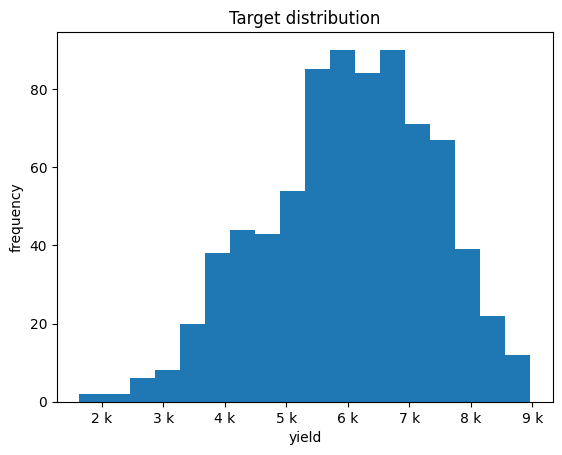

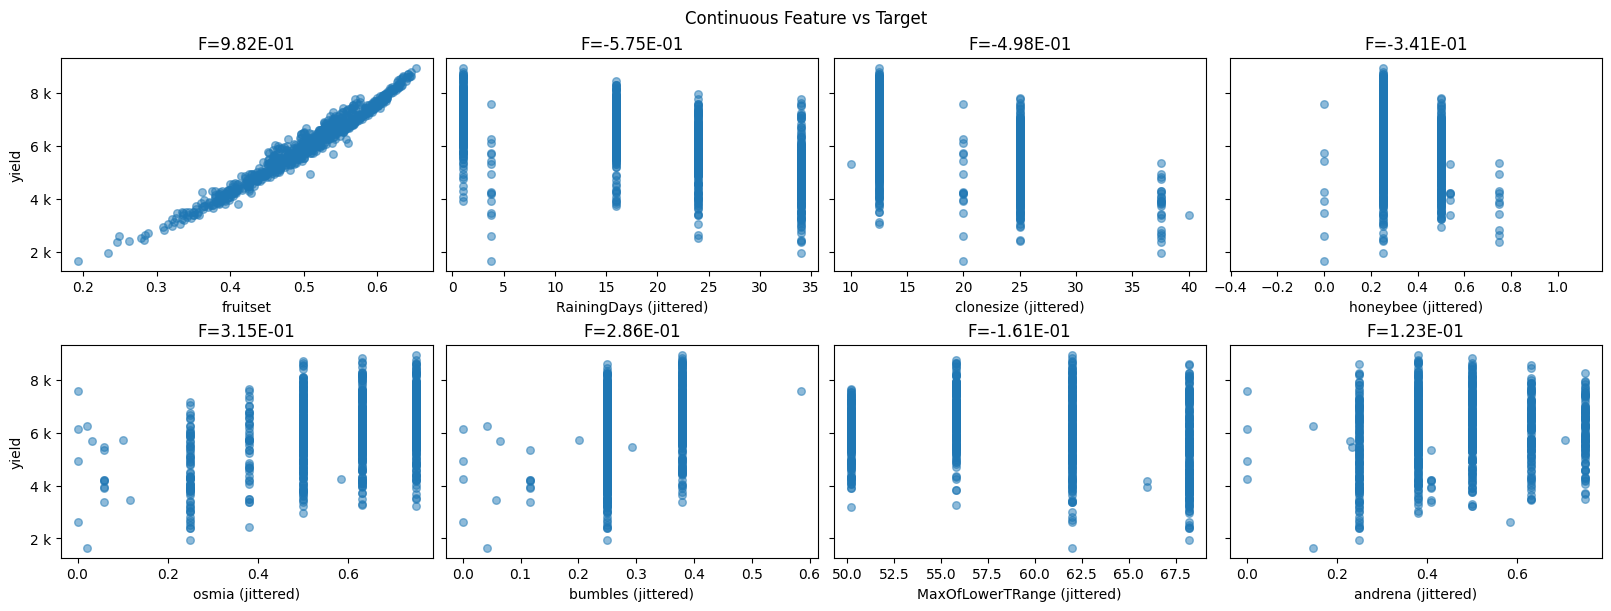

In [7]:
dabl.plot(data_clean,target_col="yield")


In [8]:
# for index, row in data.iterrows():
#     print(row["Name"], row["Age"])

In [9]:
for column_name, column_values in data_clean.items():
    upper_lim = column_values.quantile(0.90)
    lower_lim = column_values.quantile(0.05)
    

    # Your further processing here
    print(f"Column: {column_name}")
    print(f"Upper Limit: {upper_lim}, Lower Limit: {lower_lim}\n")


    data_filtered= data_clean[(data_clean[column_name] < upper_lim) & (data_clean[column_name] > lower_lim)]
    

Column: clonesize
Upper Limit: 25.0, Lower Limit: 12.5

Column: honeybee
Upper Limit: 0.5, Lower Limit: 0.25

Column: bumbles
Upper Limit: 0.38, Lower Limit: 0.25

Column: andrena
Upper Limit: 0.75, Lower Limit: 0.25

Column: osmia
Upper Limit: 0.75, Lower Limit: 0.25

Column: MaxOfUpperTRange
Upper Limit: 94.6, Lower Limit: 69.7

Column: MinOfUpperTRange
Upper Limit: 57.2, Lower Limit: 42.1

Column: AverageOfUpperTRange
Upper Limit: 79.0, Lower Limit: 58.2

Column: MaxOfLowerTRange
Upper Limit: 68.2, Lower Limit: 50.2

Column: MinOfLowerTRange
Upper Limit: 33.0, Lower Limit: 24.3

Column: AverageOfLowerTRange
Upper Limit: 55.9, Lower Limit: 41.2

Column: RainingDays
Upper Limit: 34.0, Lower Limit: 1.0

Column: AverageRainingDays
Upper Limit: 0.56, Lower Limit: 0.1

Column: fruitset
Upper Limit: 0.603420506, Lower Limit: 0.3620507912

Column: fruitmass
Upper Limit: 0.5003850422, Lower Limit: 0.3811636362

Column: seeds
Upper Limit: 41.992106201999995, Lower Limit: 29.083789846

Column:

<Axes: >

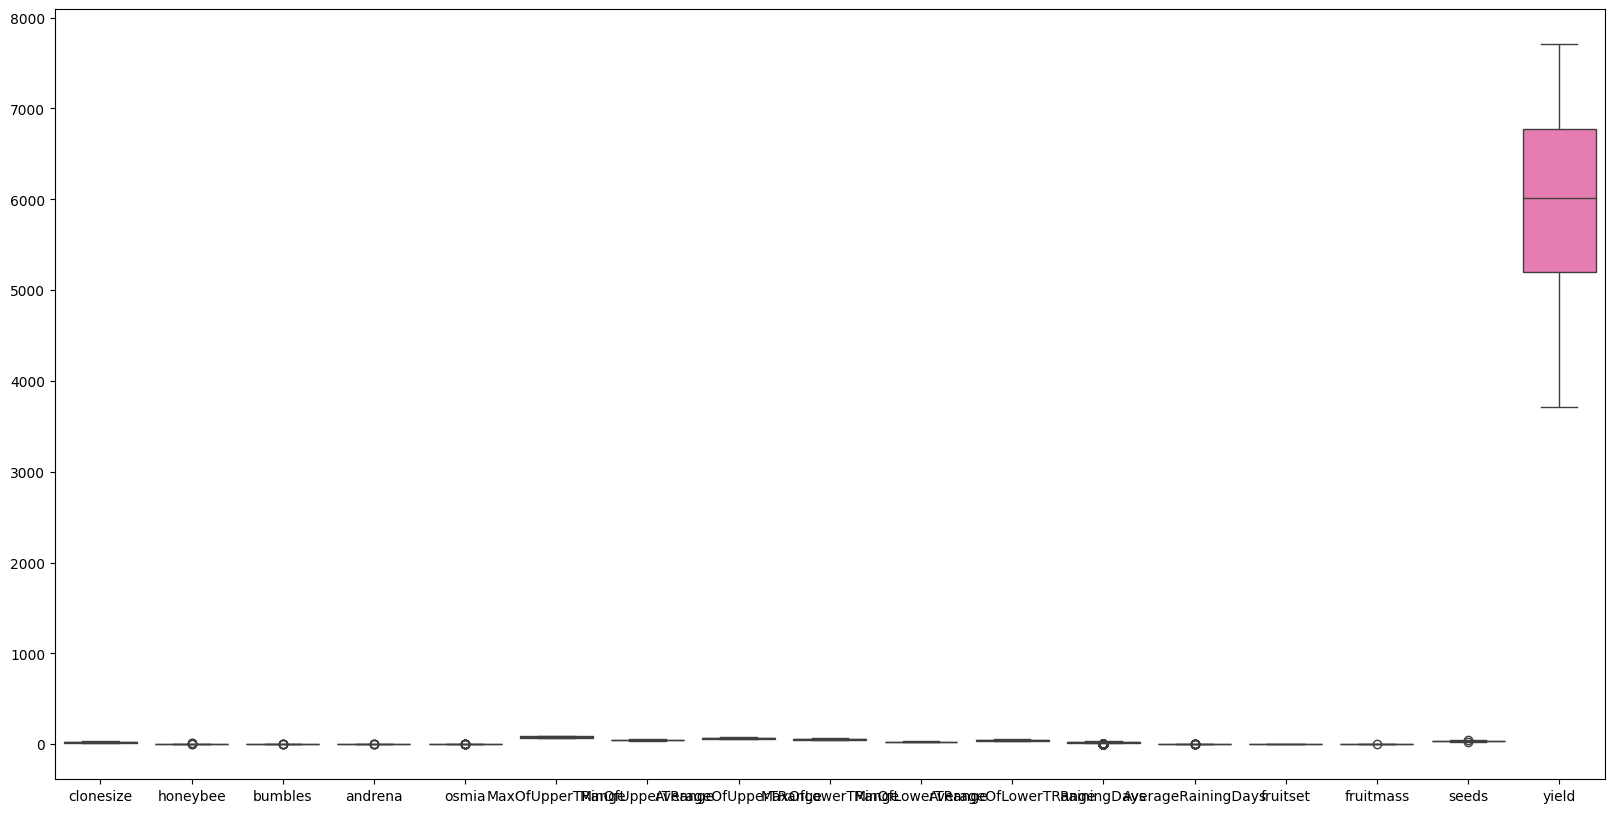

In [10]:

plt.figure(figsize=(20,10))
sns.boxplot(data=data_filtered)

In [11]:
# from ydata_profiling import ProfileReport 
# prof = ProfileReport(data_clean)
# prof.to_file(output_file='output.html')

In [12]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [13]:
train_missing= missing_values_table(data_clean )
train_missing

Your selected dataframe has 17 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


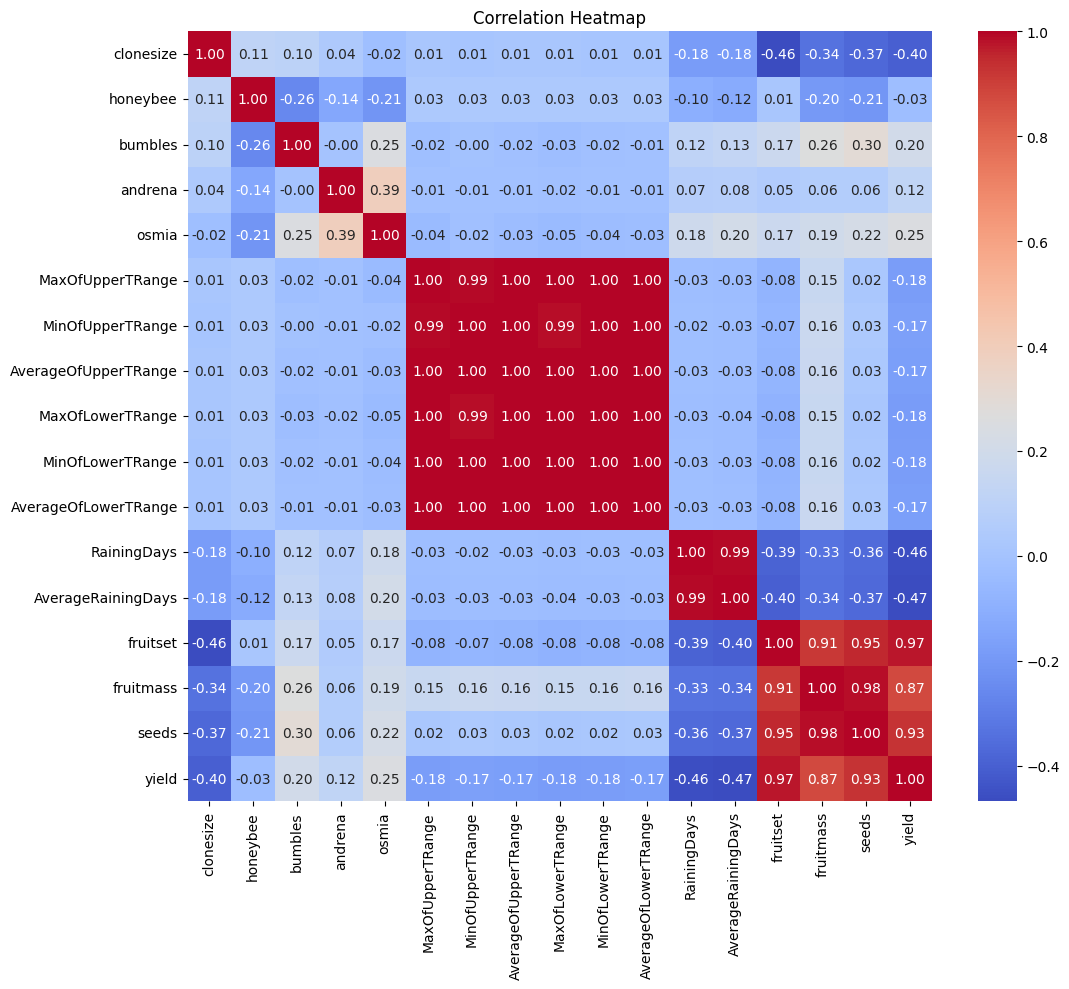

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [14]:
# sns.heatmap(data_clean.corr())
# Correlation Heatmap: Visualizing correlation between numerical columns
correlation_matrix = data_filtered.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
print

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# Assuming 'df' is your DataFrame and 'target' is your regression target column
X=data_filtered.drop(columns=['yield'])
X = add_constant(X) # Add a constant term for intercept

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# Check the VIF ues for multicollinear: ↓
print(vif)

                Variable         VIF
0                  const    0.000000
1              clonesize    3.926463
2               honeybee    3.925047
3                bumbles    2.178045
4                andrena    1.288920
5                  osmia    1.783828
6       MaxOfUpperTRange         inf
7       MinOfUpperTRange         inf
8   AverageOfUpperTRange         inf
9       MaxOfLowerTRange         inf
10      MinOfLowerTRange         inf
11  AverageOfLowerTRange         inf
12           RainingDays   63.608036
13    AverageRainingDays   72.498951
14              fruitset   52.361422
15             fruitmass  640.540637
16                 seeds  565.155131


e:\GPL\Project1\requirement-env\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
e:\GPL\Project1\requirement-env\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



    VIF starts at 1 and has no upper limit
    VIF = 1, no correlation between the independent variable and the other variables
    VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others


In [34]:
data_after_drop = data_filtered.drop(['MinOfUpperTRange','AverageOfUpperTRange','MaxOfLowerTRange','MinOfLowerTRange','AverageOfLowerTRange','AverageRainingDays','seeds','fruitset','fruitmass'],axis=1)


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# Assuming 'df' is your DataFrame and 'target' is your regression target column
X=data_after_drop.drop(columns=['yield'])
X = add_constant(X) # Add a constant term for intercept

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# Check the VIF ues for multicollinear: ↓
print(vif)

           Variable         VIF
0             const  120.260571
1         clonesize    1.079725
2          honeybee    1.134836
3           bumbles    1.177769
4           andrena    1.212813
5             osmia    1.318626
6  MaxOfUpperTRange    1.003051
7       RainingDays    1.082072


In [36]:
vif

,Variable,VIF
0,const,120.260571
1,clonesize,1.079725
2,honeybee,1.134836
3,bumbles,1.177769
4,andrena,1.212813
5,osmia,1.318626
6,MaxOfUpperTRange,1.003051
7,RainingDays,1.082072


In [40]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable
# Split the data into training and testing sets
X=data_after_drop.drop(['yield'],axis=1)
y=data_after_drop['yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model and fit it to the training data
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_reg_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
rs=r2_score(y_test, y_pred)
print(f'R-squared score: {rs}')

Mean Squared Error: 368101.02289122465
R-squared score: 0.7093604404677858


In [51]:
X = data_after_drop.drop(['yield'],axis=1)
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(data_after_drop['yield'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     206.0
Date:                Sat, 10 Feb 2024   Prob (F-statistic):          1.43e-160
Time:                        23:25:29   Log-Likelihood:                -5144.0
No. Observations:                 660   AIC:                         1.030e+04
Df Residuals:                     652   BIC:                         1.034e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7626.6368    252.098  

In [49]:
y_pred.shape

(132,)

In [52]:
data_after_drop['yield_pred'] = olsmod.predict(X)
data_after_drop['residual'] = olsmod.resid


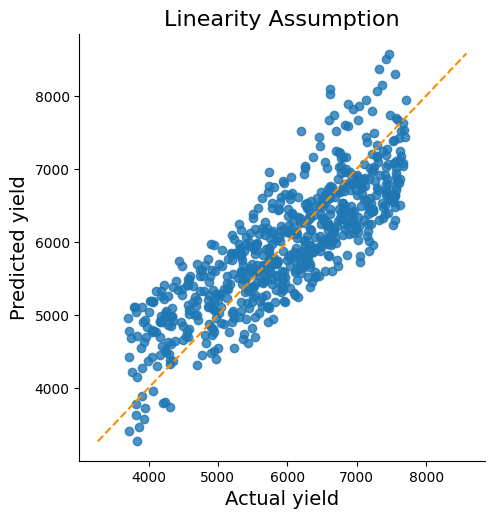

In [56]:
# Plotting the observed vs predicted values
sns.lmplot(x='yield', y='yield_pred', data=after_drop, fit_reg=False)
    
# Plotting the diagonal line
line_coords = np.arange(after_drop[['yield', 'yield_pred']].min().min()-10, 
                        after_drop[['yield', 'yield_pred']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted yield', fontsize=14)
plt.xlabel('Actual yield', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 2.4030029067039922e-06


C:\Users\FATTANI COMPUTERS\AppData\Local\Temp\ipykernel_17084\4170887319.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(after_drop['residual'])


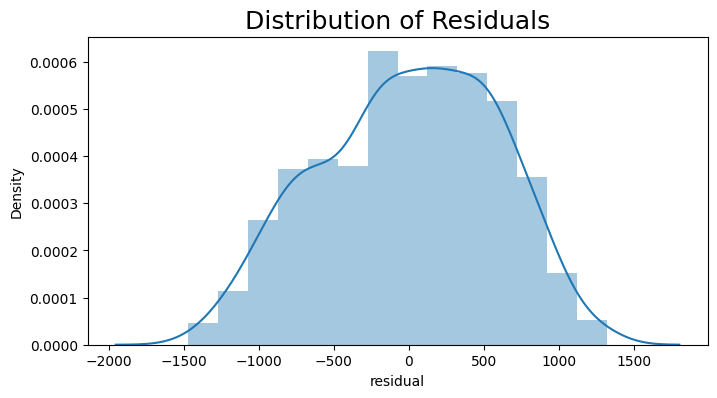

Residuals are not normally distributed


In [57]:
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(after_drop['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(after_drop['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')